# SCRIPT DESCRIPTION

# IMPORTING LIBRARIES

In [1]:
# Please check to ensure that all of the libraries imported in functions_curtailing_video_data.py are installed
# in your environment or in the same file pathway. 
import functions_curtailing_video_data
import shutil

# SAVING A BACKUP FOR THIS SCRIPT

In [2]:
# Creating the original and target file directories.
original = r'/home/dan/Projects/PseudoOnlineTests_for_RTCoG/Scripts/Recent/SpellerAnalysis/curtailing_video_data.ipynb'
target   = r'/mnt/shared/danprocessing/BACKUP/Projects/PseudoOnlineTests_for_RTCoG/Scripts/SpellerAnalysis/curtailing_video_data.ipynb'

# Saving.
shutil.copyfile(original, target);

# INPUTTING PARAMETERS

In [3]:
"""
DESCRIPTION:
Please input the parameters below.
"""

# EXPERIMENTER INPUTS:
block_id          = 'Block1'
date              = '2023_01_06'
dir_intermediates = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/Intermediates/'
patient_id        = 'CC01'
task              = 'Speller' 

"""
INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.
""";

# LOADING MEDIAPIPE HAND LANDMARK TRAJECTORIES

In [4]:
"""
DESCRIPTION:
Importing the xarray of hand trajectories. The hand trajectories array is loaded from:

dir_intermediates + patient_id + '/' + task + '/HandTrajectories/'  + date + '/Xarrays/ + 'date + '_' + block_id + '_hand_trajectories.nc'

Feel free to modify the pathway in which these starting and ending points are stored and the necessary experimenter
inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
hand_trajectories: [xarray (landmarks x time samples) > floats]; The time traces of the x- and y-coordinates 
                   for each landmark. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Loading the hand trajectories.
hand_trajectories = functions_curtailing_video_data.load_hand_trajectories(block_id, date, dir_intermediates, patient_id, task)


HAND TRAJECTORIES ARRAY
<xarray.DataArray (landmarks: 42, time_seconds: 27944)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.09794989, -0.10022779, -0.0993228 , ..., -0.09862385,
        -0.10045662, -0.10250569],
       ...,
       [ 0.58997722,  0.59225513,  0.58916479, ...,  0.59633028,
         0.59360731,  0.59225513],
       [ 0.50341686,  0.50113895,  0.49209932, ...,  0.48853211,
         0.47716895,  0.47835991],
       [ 0.69931663,  0.70159453,  0.69977427, ...,  0.71100917,
         0.71004566,  0.71070615]])
Coordinates:
  * landmarks     (landmarks) object 'WRIST_x' 'WRIST_y' ... 'PINKY_TIP_y'
  * time_seconds  (time_seconds) float64 0.0 0.033 0.067 ... 931.4 931.4 931.4

HAND LANDMARKS LIST:
['WRIST_x',
 'WRIST_y',
 'THUMB_CMC_x',
 'THUMB_CMC_y',
 'THUMB_MCP_x',
 'THUMB_MCP_y',
 'THUMB_IP_x',
 'THUMB_IP_y',


# LOADING CLICK INFORMATION

In [5]:
"""
DESCRIPTION:
Loading the click information dictionary. The click array is loaded from:

dir_intermediates + patient_id + '/' + task + '/ClickDetections/'  + date + '/Xarrays/' + date + '_' + block_id + '_click_highlights'

Feel free to modify the pathway in which these starting and ending points are stored and the necessary experimenter
inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
click_info: [dict (key: string ('backspace','keyboard','stimcolumn'); Value: xarray (1 x time samples) > strings)]; For each 
            time sample of the array of each key there is a 'no_click' or a string specific to that array. For example, the
            'backspace' key of the dictionary has an array where each element is a string named either 'no_click' or 
            'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the instance a 
            click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension
            is in units of s.
"""

# COMPUTATION:

# Loading the click information.
click_info = functions_curtailing_video_data.load_click_information(block_id, date, dir_intermediates, patient_id, task)


# PLOTTING UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

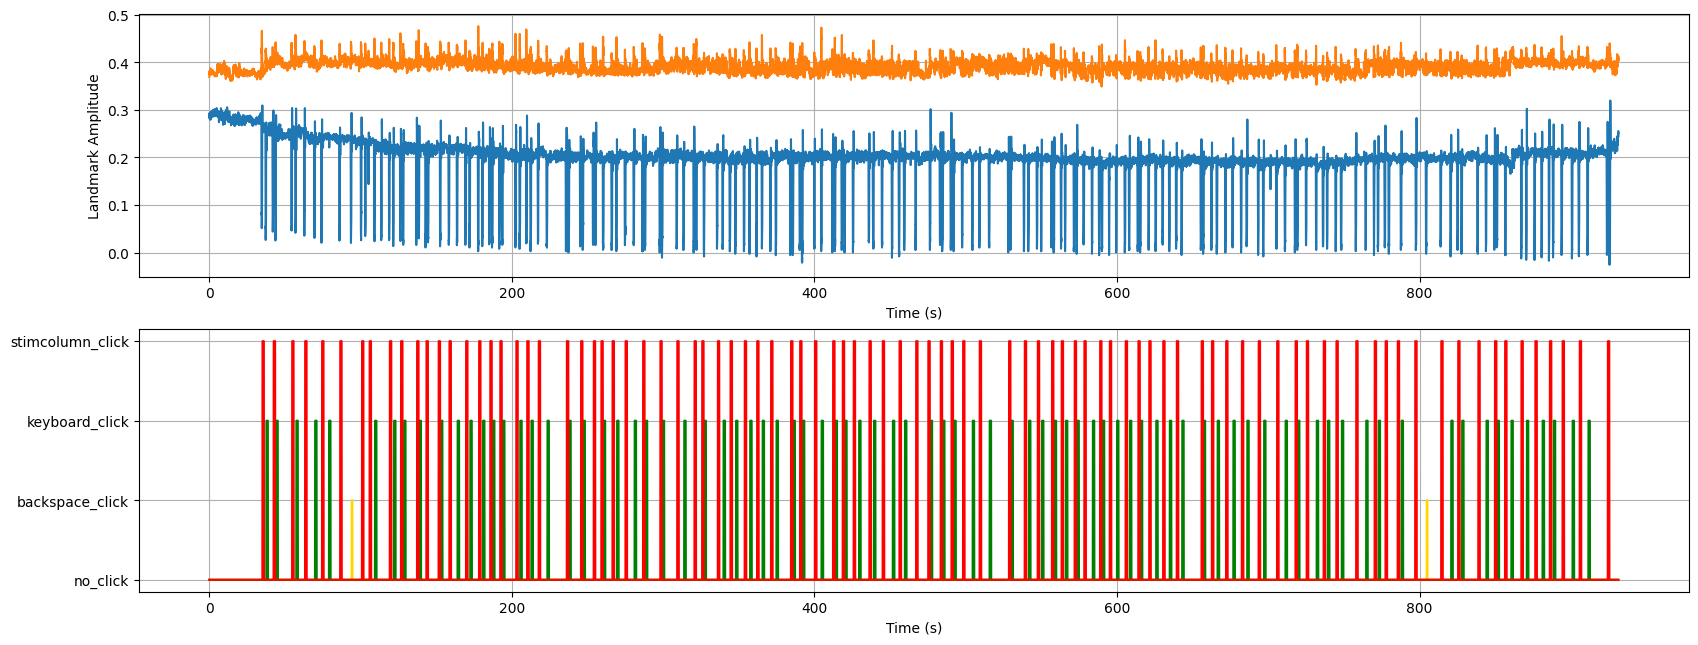

In [6]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_x', 'THUMB_MCP_y']

"""
INPUT VARIABLES:
click_info:                     [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                       [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
                                is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
                                key of the dictionary has an array where each element is a string named either 'no_click' or 
                                'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
                                instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                                rules apply. Time dimension is in units of s.
    plotcolor:                  [string]; Color corresponding to the type of click for plotting.
hand_trajectories:              [xarray (landmarks x time samples) > floats]; The time traces of the x- and y-coordinates 
                                for each landmark. The time domain is in units of seconds. 
landmark_trajectories_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_curtailing_video_data.plotting_landmarks_and_clicks(click_info, hand_trajectories, landmark_trajectories_plotting)


# LOADING BLOCK START AND STOP TIMES

In [7]:
"""
DESCRIPTION:
Loading the true starting and stopping times for the current block. The starting and stop times are in:

dir_intermediates + patient_id + '/Speller/BlocksStartAndStops/' + date + '/' + date + '_' + block_id +'_StartStop.txt'

Feel free to modify the pathway in which these starting and ending points are stored and the necessary experimenter
inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.

OUTPUT VARIABLES:
t_start: [float (units: s)]; True starting time of the block.
t_stop:  [float (units: s)]; True ending time of the block.
"""

# COMPUTATION:

# Loading the starting and stopping times for the block.
t_start, t_stop = functions_curtailing_video_data.load_start_stop_times(block_id, date, dir_intermediates, patient_id)

print(t_start)
print(t_stop)


31.667
926.5


# CURTAILING

In [8]:
"""
DESCRIPTION:
Curtailing the hand trajectories and the click information according to the block start and stop times. For reference see 
computing_block_start_stop_times.ipynb.

INPUT VARIABLES:
click_info:        [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:          [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there is a 'no_click'
                   string or a click-string specific to that xarray. For example, the 'backspace' key of the dictionary has an
                   array where each element is a string named either 'no_click' or 'backspace_click'. The 'backspace_click' 
                   elements do not occur consecutively and describe the instance a click on the backspace key occured. For the
                   'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension is in units of s.
    plotcolor:     [string]; Color corresponding to the type of click for plotting.
hand_trajectories: [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates
                   for each landmark. The time domain is in units of seconds. 
t_start:           [float (units: s)]; True starting time of the block.
t_stop:            [float (units: s)]; True ending time of the block.

NECESSARY FUNCTIONS:
curtailing_click_info
curtailing_hand_trajectories

OUTPUT VARIABLES:
click_info_curt:        [dict (key: string ('backspace','keyboard','stimcolumn'); Values: data, plotcolor)]; Same as click_info, but 
                        all xarrays are curtailed within the start and stop times.
hand_trajectories_curt: [xarray (landmarks x time samples) > floats]; Same as above but curtailed within the start and
                        stop times.                   
"""

# COMPUTATION:

# Curtailing the click information and hand trajectories.
click_info_curt, hand_trajectories_curt = functions_curtailing_video_data.curtailing(click_info, hand_trajectories, t_start, t_stop)


[ 31.667  31.7    31.733 ... 926.433 926.467 926.5  ]
[ 31.667  31.7    31.733 ... 926.433 926.467 926.5  ]
[ 31.667  31.7    31.733 ... 926.433 926.467 926.5  ]
<xarray.DataArray 'time_seconds' ()>
array(0.)
Coordinates:
    time_seconds  float64 0.0
[ 31.667  31.7    31.733 ... 926.433 926.467 926.5  ]


# PLOTTING CURTAILED INFORMATION:

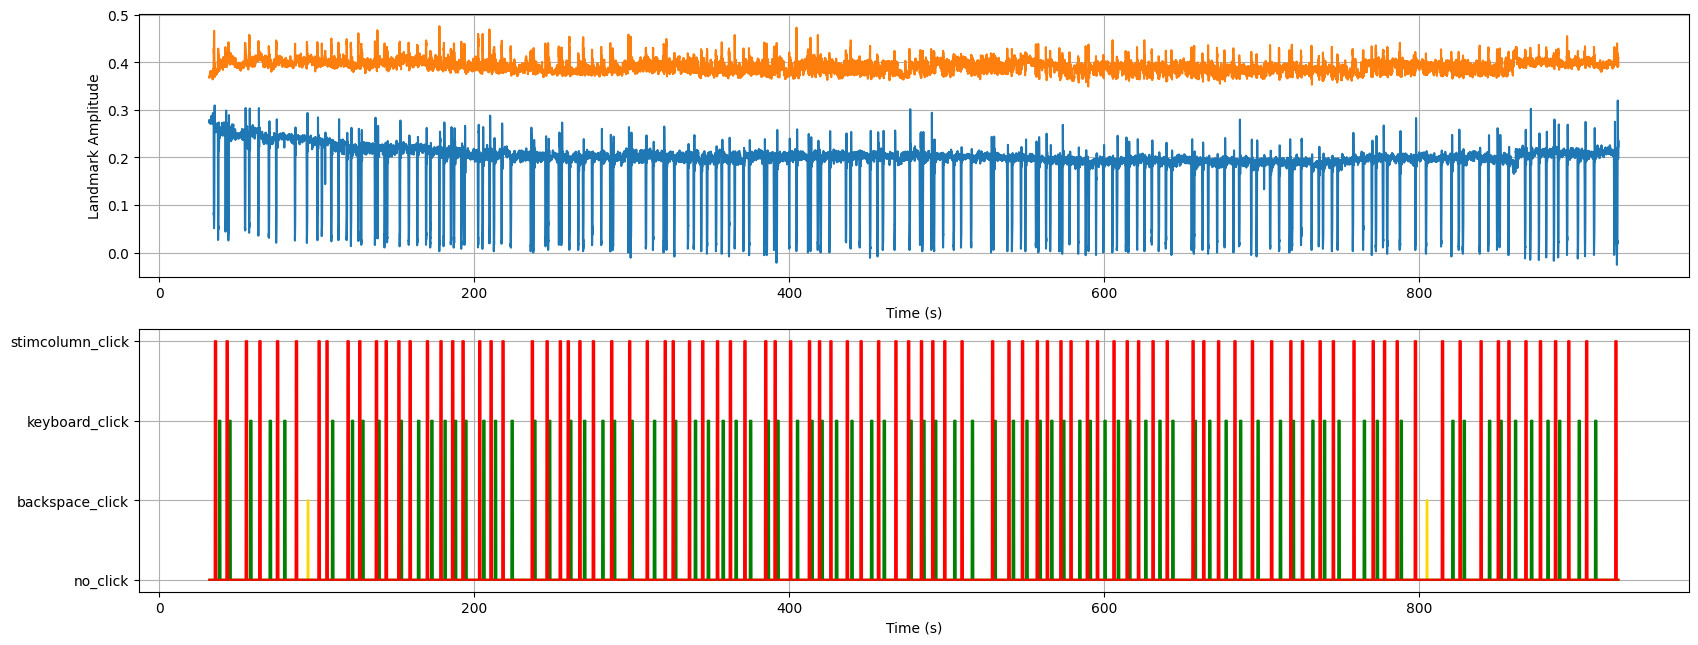

In [11]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_x', 'THUMB_MCP_y']

"""
click_info:        [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:          [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there is a 'no_click'
                   string or a click-string specific to that xarray. For example, the 'backspace' key of the dictionary has an
                   array where each element is a string named either 'no_click' or 'backspace_click'. The 'backspace_click' 
                   elements do not occur consecutively and describe the instance a click on the backspace key occured. For the
                   'keyboard' and 'stimcolumn' keys, similar rules apply. All xarrays are curtailed between the startng and 
                   stopping times. Time dimension is in units of s. 
    plotcolor:     [string]; Color corresponding to the type of click for plotting.
hand_trajectories: [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates
                   for each landmark. Curtailed between the starting and stopping times. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Plotting curtailed hand landmarks and click information.
functions_curtailing_video_data.plotting_landmarks_and_clicks(click_info_curt, hand_trajectories_curt, landmark_trajectories_plotting)


# SAVING CURTAILED INFORMATION

In [12]:
"""
DESCRIPTION:
Saving the curtailed hand trajectories and click information. The pathways to which the curtailed hand trajectories and click
information are saved are shown below:

dir_intermediates + patient_id + '/' + task + '/ClickDetections/'  + date + '/Curtailed/' + date + '_' + block_id + '_click_highlights'

dir_intermediates + patient_id + '/' + task + '/HandTrajectories/'  + date + '/Curtailed/' + date + '_' + block_id + '_hand_trajectories.nc'

Feel free to modify the pathway in which these starting and ending points are stored and the necessary experimenter
inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
click_info:        [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:          [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there is a 'no_click'
                   string or a click-string specific to that xarray. For example, the 'backspace' key of the dictionary has an
                   array where each element is a string named either 'no_click' or 'backspace_click'. The 'backspace_click' 
                   elements do not occur consecutively and describe the instance a click on the backspace key occured. For the
                   'keyboard' and 'stimcolumn' keys, similar rules apply. All xarrays are curtailed between the startng and 
                   stopping times. Time dimension is in units of s. 
    plotcolor:     [string]; Color corresponding to the type of click for plotting.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
hand_trajectories: [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates
                   for each landmark. Curtailed between the starting and stopping times. The time domain is in units of seconds. 
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.
"""

# SAVING

# Saving the curtailed hand trajectories and click information.
functions_curtailing_video_data.saving_curtailed_info(block_id, click_info_curt, date, dir_intermediates, hand_trajectories_curt, patient_id, task)
